In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
df.shape  

(8494, 24)

In [4]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_num', 'Cabin_port', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend', 'Name',
       'Transported'],
      dtype='object')

#### scaler

In [5]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
# train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)


#### minxax scaler

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('MinMaxScaler')

MinMaxScaler Results


#### 3-2 모델

Fitting 3 folds for each of 7 candidates, totalling 21 fits


C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': array([0]),
                         'learning_rate': array([0.]),
                         'max_depth': array([0, 1, 2, 3, 4, 5, 6]),
                         'random_state': [42], 'subsample': array([0.])},
             verbose=2)

best_params :  {'colsample_bytree': 0, 'learning_rate': 0.0, 'max_depth': 1, 'random_state': 42, 'subsample': 0.0}
best_score_ :  0.4952170713760118
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       851
           1       0.00      0.00      0.00       848

    accuracy                           0.50      1699
   macro avg       0.25      0.50      0.33      1699
weighted avg       0.25      0.50      0.33      1699



C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

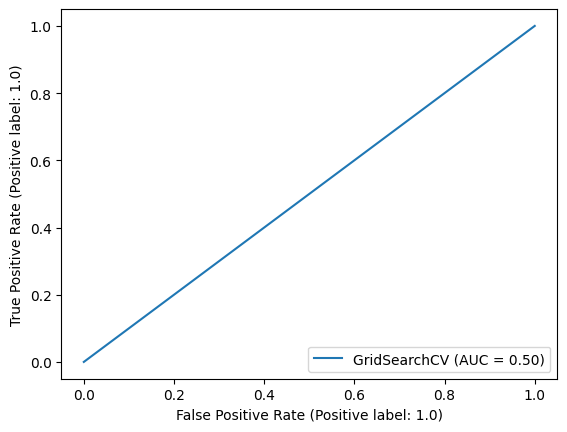

In [7]:
#test
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

from MyModule import girdcvconv as gc


estimator = XGBClassifier()

learning_rate_list = [0.05]
max_depth_list =  [7]
subsample_list = np.arange(0.7)
colsample_bytree_list = np.arange(1)

parameter={

    'learning_rate' : learning_rate_list,
    'max_depth' : max_depth_list,
    'subsample' : subsample_list,
    'colsample_bytree' : colsample_bytree_list,
    
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=1, verbose=2, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈

model.fit(X_train, y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)


pred = model.predict(X_test)
test_score = roc_auc_score(y_test,pred)

print(classification_report(y_test, pred, target_names=["0","1"]))

plot_roc_curve(model, X_test, y_test)

gc.paramsTocsv(data_name='train_update', scaler='MinMaxScaler', model_name='XGBClassifier', best_params=model.best_params_, best_score=model.best_score_, testset_score=test_score)

In [7]:
## 예시
# from MyModule import girdcvconv as gc
# best_params =  {'criterion': 'gini', 'max_depth': 19, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
# best_score_ =  0.7113550153749467
# gc.paramsTocsv(data_name='obesity', scaler='StandardScaler', model_name='DecisionTreeClassifier', best_params=best_params, best_score=best_score_)

In [6]:
# 생성된 dataframe 확인
import pandas as pd
df = pd.read_csv('./modeldata/train_update.csv')
df 

,date,model_name,scaler,best_score,testset_score,colsample_bytree,learning_rate,max_depth,random_state,subsample
0,2022-12-06 17:33,XGBClassifier,MinMaxScaler,0.495217,NaN,0,0.0,1,42,0.0
1,2022-12-07 09:31:59,XGBClassifier,MinMaxScaler,0.495217,0.5,0,0.0,1,42,0.0


In [7]:
# 특정 데이터프레임 선택
import pandas as pd
from MyModule import selectparameter as sp

bestparams = sp.selectparam('train_update',1)
print(bestparams)

{'colsample_bytree': [0], 'learning_rate': [0.0], 'max_depth': [1], 'random_state': [42], 'subsample': [0.0]}


Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0], 'learning_rate': [0.0],
                         'max_depth': [1], 'random_state': [42],
                         'subsample': [0.0]},
             verbose=1)

confusion_matrix : 
 [[851   0]
 [848   0]]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

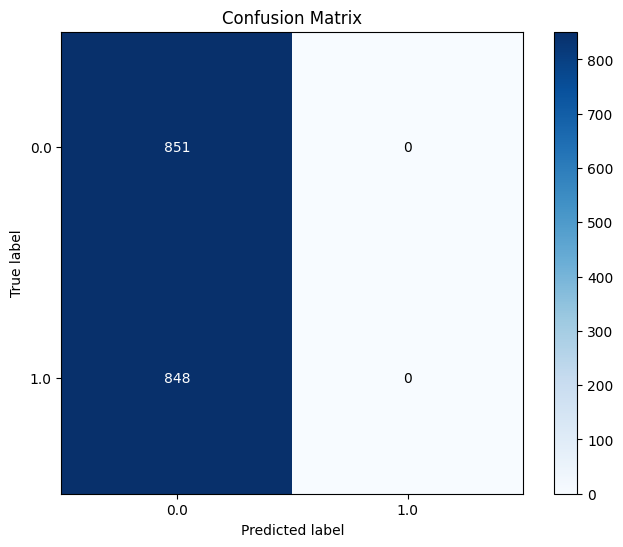

C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

ValueError: DataFrame constructor not properly called!

In [8]:
#test to report
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from MyModule import report as rp

estimator = XGBClassifier()
model = GridSearchCV(estimator, param_grid=bestparams, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

# classification_report의 output_dict=True 이면 데이터프레임으로 바꿀 수 있다
cl_report = metrics.classification_report(y_test,pred,output_dict=True)

rp.reportTocsv(data_name='train_update', scaler='MinMaxScaler', model_name='XGBClassifier', report=cl_report)

[0]	validation_0-logloss:0.59062
[1]	validation_0-logloss:0.53494
[2]	validation_0-logloss:0.50013
[3]	validation_0-logloss:0.47849
[4]	validation_0-logloss:0.46413
[5]	validation_0-logloss:0.45035
[6]	validation_0-logloss:0.44229
[7]	validation_0-logloss:0.43393
[8]	validation_0-logloss:0.42835
[9]	validation_0-logloss:0.42488
[10]	validation_0-logloss:0.42497
[11]	validation_0-logloss:0.42037
[12]	validation_0-logloss:0.41680
[13]	validation_0-logloss:0.41381
[14]	validation_0-logloss:0.41457
[15]	validation_0-logloss:0.41332
[16]	validation_0-logloss:0.41302
[17]	validation_0-logloss:0.41301
[18]	validation_0-logloss:0.41362
[19]	validation_0-logloss:0.41224
[20]	validation_0-logloss:0.41118
[21]	validation_0-logloss:0.41054
[22]	validation_0-logloss:0.41003
[23]	validation_0-logloss:0.41013
[24]	validation_0-logloss:0.40962
[25]	validation_0-logloss:0.40966
[26]	validation_0-logloss:0.40947
[27]	validation_0-logloss:0.40973
[28]	validation_0-logloss:0.40913
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7975279576221307

confusion_matrix : 
 [[688 163]
 [181 667]]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

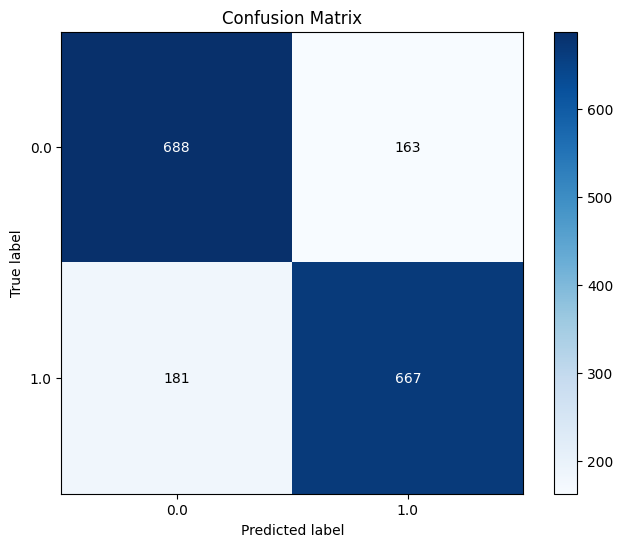

In [43]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()